## Dept : DSE
## Name: Alli Khadga Jyoth
## Roll.No : 19024
## Assignment 3

In [1]:
# !pip install covid

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from covid import Covid
import requests
import json
import matplotlib.pyplot as plt

In [3]:
source = ['john_hopkins','worldometers']

In [4]:
cd = Covid(source[0])
data = cd.get_data()
df = pd.DataFrame(data)
df[0:10]

,id,country,confirmed,active,deaths,recovered,latitude,longitude,last_update
0,182,US,45924891,None,745384,None,40.000000,-100.000000,1635592943000
1,80,India,34260470,None,457740,None,20.593684,78.962880,1635592943000
2,24,Brazil,21793401,None,607462,None,-14.235000,-51.925300,1635592943000
3,186,United Kingdom,9021716,None,140815,None,55.000000,-3.000000,1635592943000
4,145,Russia,8338053,None,233063,None,61.524000,105.318800,1635592943000
5,181,Turkey,7985914,None,70207,None,38.963700,35.243300,1635592943000
6,63,France,7254818,None,118590,None,46.227600,2.213700,1635592943000
7,82,Iran,5909402,None,125998,None,32.427908,53.688046,1635592943000
8,7,Argentina,5287447,None,115935,None,-38.416100,-63.616700,1635592943000
9,38,Colombia,5011704,None,127225,None,4.570900,-74.297300,1635592943000


#### Working only with WorldOmeter data because it includes all the important variables of john Hopkins data and also includes other variables 

### Working with Wolrd-O-Meter Data

In [5]:
cd = Covid(source[1])
data = cd.get_data()
df = pd.DataFrame(data)
df[0:10]

,country,total_cases,confirmed,new_cases,deaths,new_deaths,recovered,active,active_cases,critical,total_tests,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population
0,North America,56182770,56182770,4328,1146961,325,44804890,10230919,10230919,19587,0,0,0,0,0
1,Asia,79220295,79220295,34871,1169060,835,76277215,1774020,1774020,26927,0,0,0,0,0
2,South America,38387664,38387664,0,1169957,0,36548106,669601,669601,12328,0,0,0,0,0
3,Europe,64233735,64233735,131624,1299385,2397,57872174,5062176,5062176,13197,0,0,0,0,0
4,Africa,8566995,8566995,140,218519,5,7902635,445841,445841,2263,0,0,0,0,0
5,Oceania,308526,308526,1789,3699,14,251921,52906,52906,324,0,0,0,0,0
6,0,721,721,0,15,0,706,0,0,0,0,0,0,0,0
7,World,246900706,246900706,172752,5007596,3576,223657647,18235463,18235463,74626,0,0,31675,642.4,0
8,USA,46771979,46771979,0,765722,0,36646900,9359357,9359357,12716,697847798,0,140214,2296,333574837
9,India,34260470,34260470,751,457773,0,33641175,161522,161522,8944,607062619,0,24507,327,1397976093


### World Plot

#### Note : Some axis are in Logarithmic Scale

array([<AxesSubplot:title={'center':'World'}>], dtype=object)

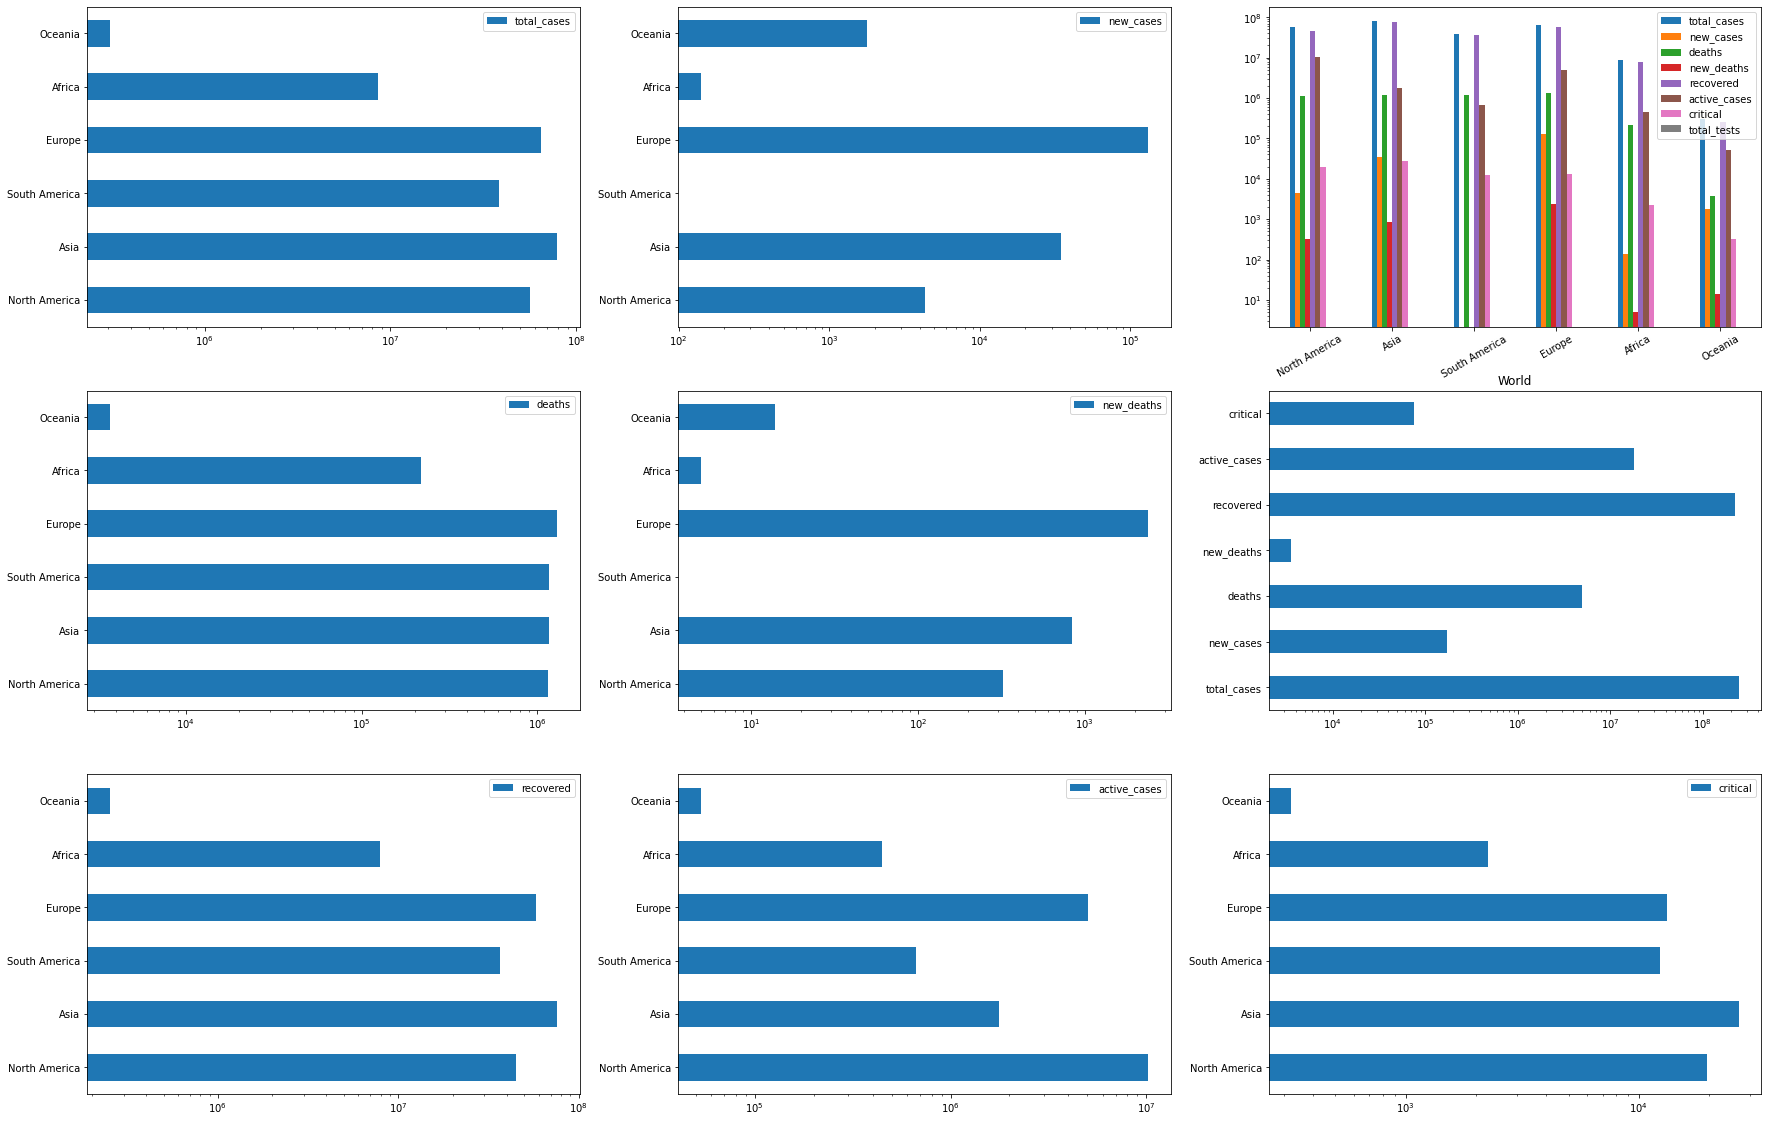

In [6]:
df_w = df[0:6][['country','total_cases','new_cases','deaths','new_deaths','recovered','active_cases','critical','total_tests']]
fig,axs = plt.subplots(nrows=3,ncols=3,figsize = [30,20],sharey=False)
df_w.plot(kind='bar',ax =axs[0,2],x='country',logy=True,stacked=False,xlabel='',rot=30)
# plt.setp(axs[0,2].get_xticklabels(),rotation=30,ha='right')
df_w[['total_cases','country']].plot(ax=axs[0,0],kind ='barh',x = 'country',xlabel='',logx=True)
df_w[['new_cases','country']].plot(ax=axs[0,1],kind ='barh',x = 'country',xlabel='',logx=True)
df_w[['deaths','country']].plot(ax=axs[1,0],kind ='barh',x = 'country',xlabel='',logx=True)
df_w[['new_deaths','country']].plot(ax=axs[1,1],kind ='barh',x = 'country',xlabel='',logx=True)
df_w[['recovered','country']].plot(ax=axs[2,0],kind ='barh',x = 'country',xlabel='',logx=True)
df_w[['active_cases','country']].plot(ax=axs[2,1],kind ='barh',x = 'country',xlabel='',logx=True)
df_w[['critical','country']].plot(ax=axs[2,2],kind ='barh',x = 'country',xlabel='',logx=True)
k=pd.DataFrame(df.loc[7][['total_cases','new_cases','deaths','new_deaths','recovered','active_cases','critical']])
k.plot(kind='barh',subplots=True,ax=axs[1,2],title ={'World'},legend=False,logx=True)

### Pre processing Data to be Used for other analysis

In [7]:
df_c = df.drop(columns=['confirmed','active','total_tests_per_million'])[8:]
df_c['population']=df_c['population'].astype(int)
df_c['total_cases_per_million']=df_c['total_cases_per_million'].astype(int)
df_c['total_deaths_per_million']=df_c['total_deaths_per_million'].astype(int)
pop_sort= df_c.sort_values('population',ascending=False)[0:10]# Top 10 countries sorted by population
cases_sort = df_c.sort_values('total_cases',ascending=False)[0:10]# Top 10 countries sorted by  Covid cases
death_sort = df_c.sort_values('deaths',ascending=False)[['deaths','country']][0:10]# Top 10 countries sorted by Deaths
cases_per_mil= df_c.sort_values('total_cases_per_million',ascending=False)[0:10]# Top 10 countries sorted by Cases density (Cases per million)
newcase_sort = df_c.sort_values('new_cases',ascending=False)[0:10]# Top 10 countries sorted by new cases
# Resetting the index.
pop_sort.reset_index(inplace = True,drop = True)
cases_sort.reset_index(inplace = True,drop = True)
death_sort.reset_index(inplace = True,drop = True)
newcase_sort.reset_index(inplace = True,drop = True)
cases_per_mil.reset_index(inplace=True,drop=True)
pop_sort
# df_c
# cases_sort
# cases_per_mil
# death_sort

,country,total_cases,new_cases,deaths,new_deaths,recovered,active_cases,critical,total_tests,total_cases_per_million,total_deaths_per_million,population
0,China,97080,78,4636,0,91681,763,39,160000000,67,3,1439323776
1,India,34260470,751,457773,0,33641175,161522,8944,607062619,24507,327,1397976093
2,USA,46771979,0,765722,0,36646900,9359357,12716,697847798,140214,2296,333574837
3,Indonesia,4243835,620,143388,27,4088138,12309,0,46524399,15301,517,277354458
4,Pakistan,1272345,658,28439,8,1220941,22965,1364,20750978,5616,126,226566346
5,Brazil,21793401,0,607504,0,20986901,198996,8318,63776166,101572,2831,214561469
6,Nigeria,211798,0,2895,0,202962,5941,11,3298966,995,14,212893081
7,Bangladesh,1569162,0,27854,0,1532966,8342,1389,10319404,9404,167,166862699
8,Russia,8472797,40251,237380,1160,7331424,903993,2300,206300000,58026,1626,146017429
9,Mexico,3802287,4001,287951,320,3163121,351215,4798,11323003,29086,2203,130726937


<AxesSubplot:title={'center':'India'}>

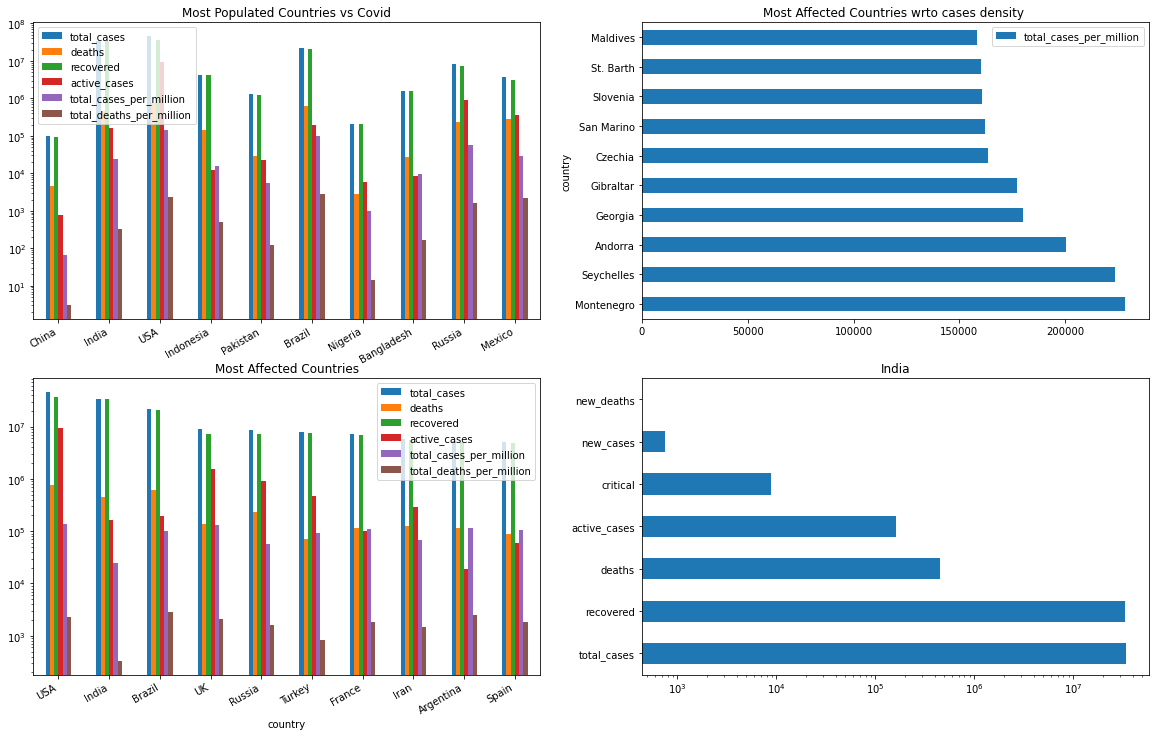

In [8]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize = [20,12],sharey=False)

pop_sort.drop(columns=['new_cases','new_deaths','critical','total_tests','population']).plot(kind='bar',x ='country',ax=axs[0,0],title = 'Most Populated Countries vs Covid',logy=True,xlabel='')
cases_sort.drop(columns=['new_cases','new_deaths','critical','total_tests','population']).plot(kind='bar',x ='country',ax=axs[1,0],title = 'Most Affected Countries',logy=True)

plt.setp(axs[0,0].get_xticklabels() + axs[1,0].get_xticklabels(), rotation=30, ha='right')

cases_per_mil['total_cases_per_million']=cases_per_mil['total_cases_per_million'].astype(float,copy=False)
cases_per_mil[['country','total_cases_per_million']].plot(x='country',kind='barh',ax=axs[0,1],title = 'Most Affected Countries wrto cases density ')

ind=pd.DataFrame(pop_sort.loc[1][['total_cases','recovered','deaths','active_cases','critical','new_cases','new_deaths']])
ind.plot(kind='barh',subplots=False,title = 'India',legend=False,ax=axs[1,1],sharex=False,logx=True,sort_columns=True)


In [2]:
pop_sort_plt=pop_sort.drop(columns=['new_cases','new_deaths','critical','total_tests','population','total_cases','total_cases_per_million','total_deaths_per_million'])
pop_sort_plt.plot(kind='barh',x ='country',stacked=True,mark_right=True,figsize=[20,8],title = 'Most Populated Countries vs Covid',logx=True)

df_total = pop_sort_plt["deaths"] + pop_sort_plt["recovered"] + pop_sort_plt["active_cases"]

# Calculating and adding the percentages to the graph
df_rel = pop_sort_plt[pop_sort_plt.columns[1:]].div(df_total, 0)*100  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(pop_sort_plt.iloc[:, 1:].cumsum(1)[n],pop_sort_plt[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',va = 'center')
# Facing some issues to correctly place the percentages on the figure

NameError: name 'pop_sort' is not defined

C:\Users\KHADGA~1\AppData\Local\Temp/ipykernel_18972/3920270438.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i]//2,y[i], ha = 'center',


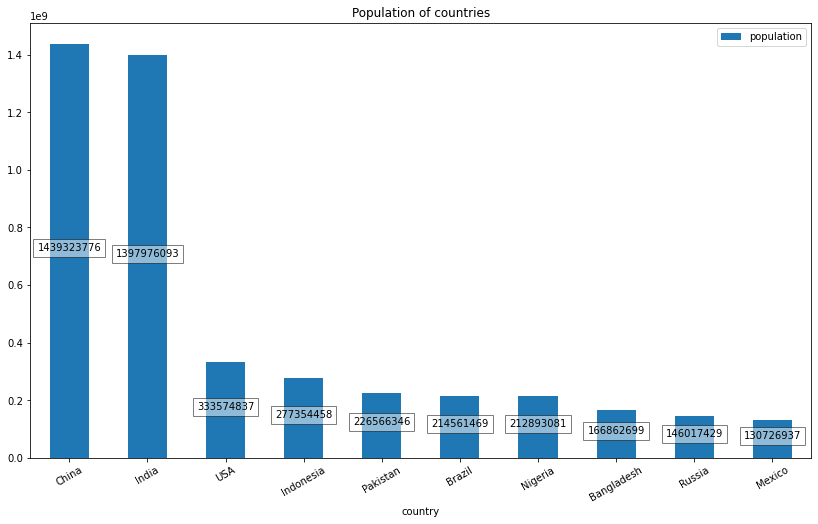

In [10]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))
pop_sort[['population','country']].plot(kind='bar',x='country',figsize=[14,8],logx=False,rot=30,title='Population of countries')
addlabels(pop_sort['country'],pop_sort['population'])


### Correlation Matrix 

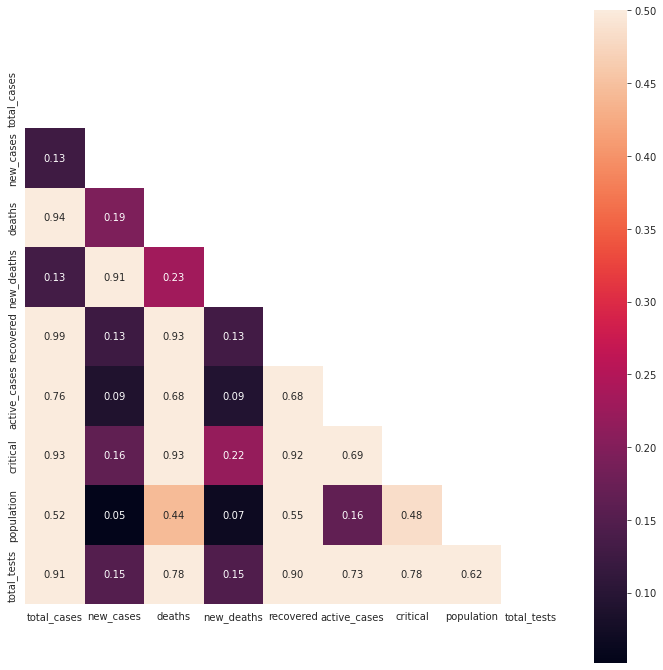

In [11]:
df_c = df_c[['country','total_cases','new_cases','deaths','new_deaths','recovered','active_cases','critical','population','total_tests']]
# df_c['population']=df_c['population'].astype(int)
corr = df_c.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(12, 12))

    ax = sns.heatmap(corr, mask=mask, vmax=.5, square=True,fmt = ".2f", annot = True)
    
# df_c.head()
# df_c.corr()

<AxesSubplot:xlabel='population in billion'>

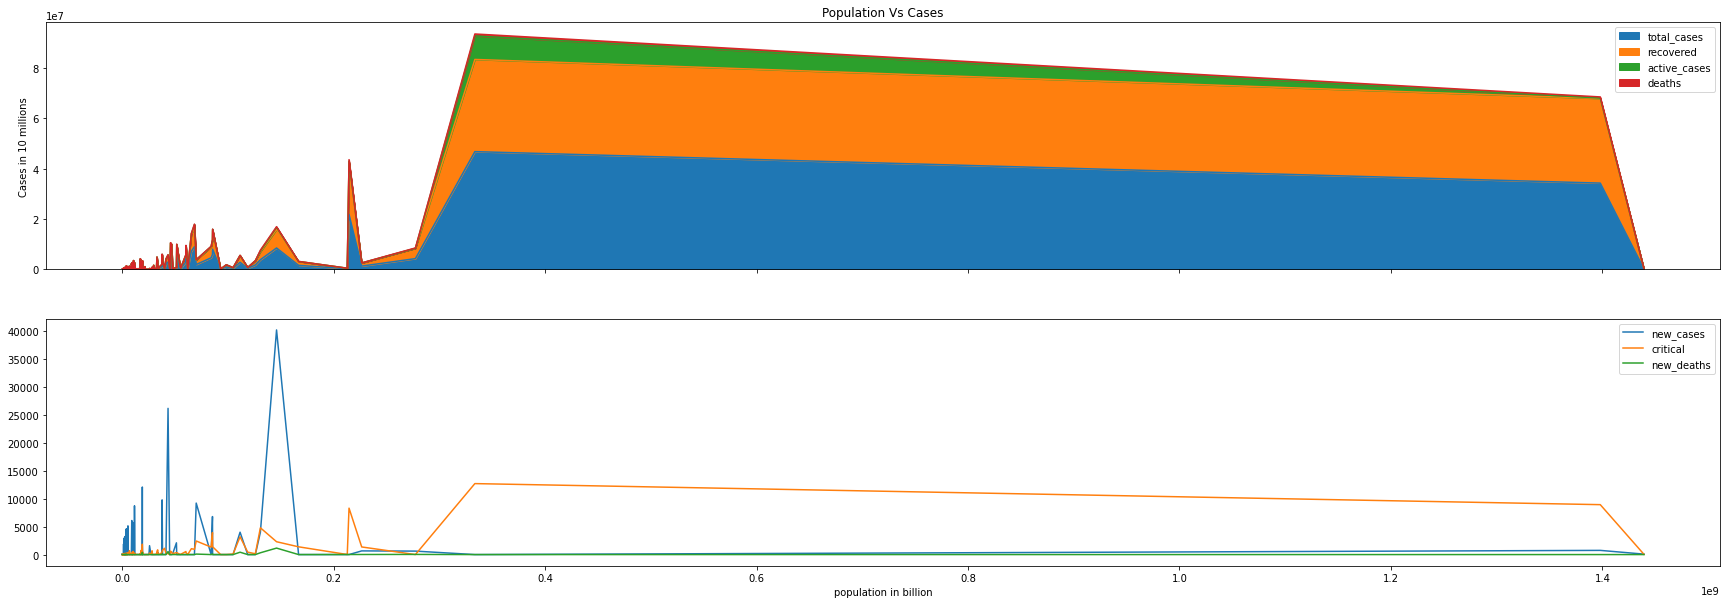

In [12]:
fig,axs = plt.subplots(2,sharex=True)
df_c[['population','total_cases','recovered','active_cases','deaths']].sort_values('population').plot(x = 'population',ax=axs[0],kind = 'area',figsize=[30,10],title='Population Vs Cases',ylabel = 'Cases in 10 millions',xlabel = 'Population in Billions')
df_c[['population','new_cases','critical','new_deaths']].sort_values('population',ascending=False).plot(x = 'population',kind='line',figsize=[30,10],ax=axs[1],xlabel='population in billion')

<AxesSubplot:title={'center':'deaths Vs Population'}, xlabel='population'>

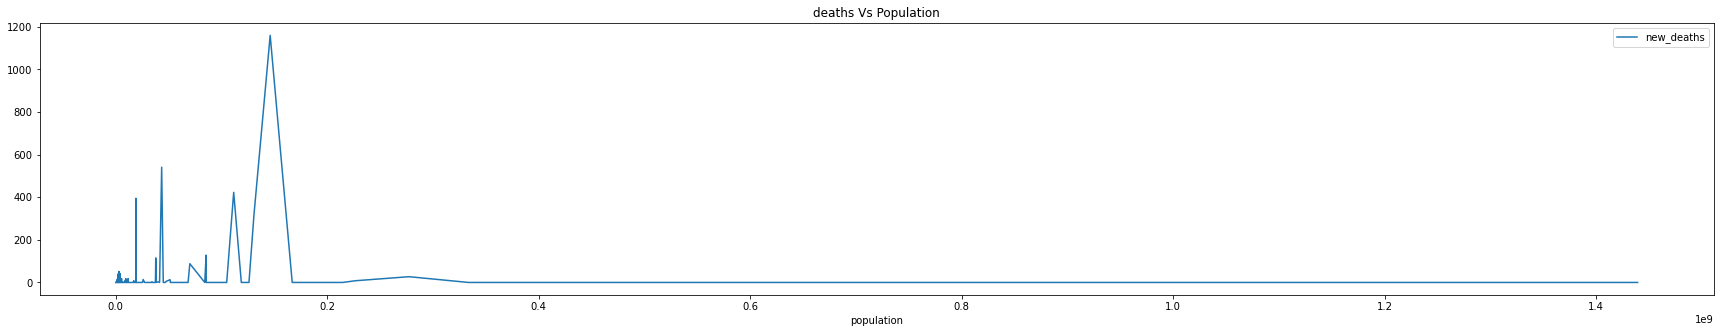

In [13]:
df_c[['population','new_deaths']].sort_values('population',ascending=False).plot(x = 'population',kind='line',figsize=[30,5],title='deaths Vs Population')

### Deaths and New Cases plot

<AxesSubplot:ylabel='country'>

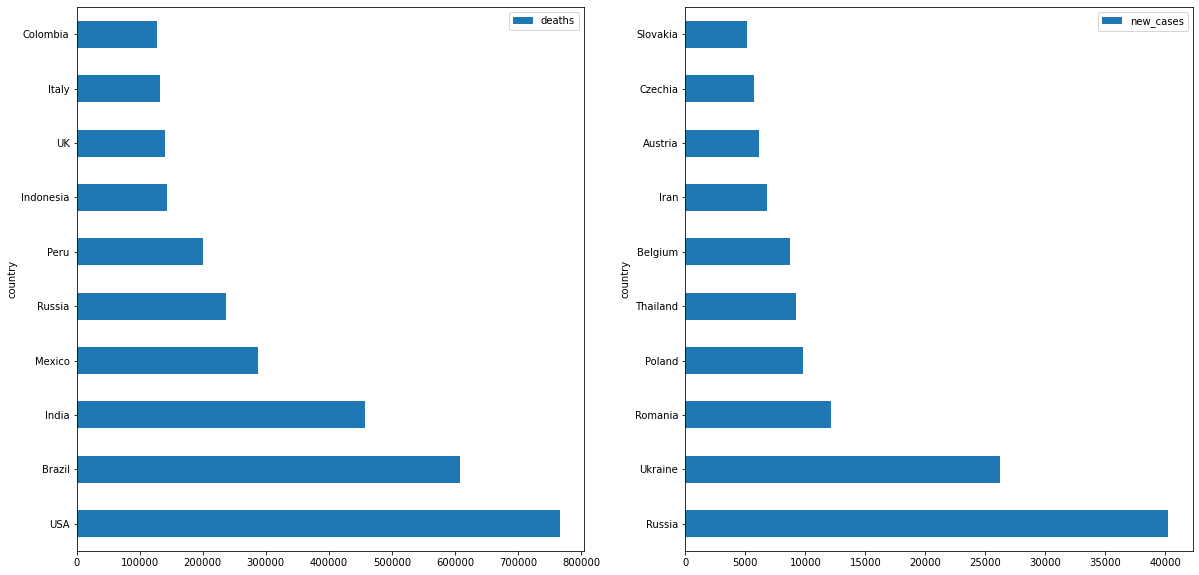

In [14]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=[20,10])
death_sort.plot(kind='barh',x='country',ax=axs[0])
newcase_sort[['new_cases','country']].plot(kind='barh',x='country',ax=axs[1])  

##### Recovery Ratio ( # of people recovered /Total Cases)

<AxesSubplot:ylabel='country'>

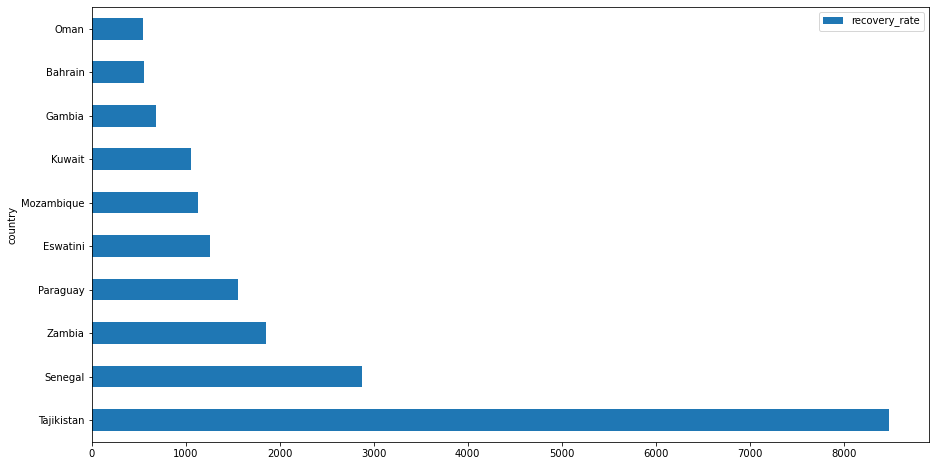

In [15]:
df_c = df_c[['country','total_cases','new_cases','deaths','new_deaths','recovered','active_cases','critical','population']]
df_c.reset_index(inplace=True,drop=True)
# df_c['active_cases']
df_c['recovery_rate'] = df_c['recovered']/df_c['active_cases']
# cleaning the infinity values
recovery_rate_sort=df_c.where(~(df_c['recovery_rate'] == np.infty),0)[['recovery_rate','country']]
recovery_rate_sort = recovery_rate_sort.sort_values('recovery_rate',ascending=False)[0:10]
recovery_rate_sort.reset_index(inplace = True,drop = True)
df_c
recovery_rate_sort
recovery_rate_sort.plot(kind='barh',x='country',figsize=[15,8])

## Working with Timeseries Data

In [16]:
dft=pd.read_csv('countries-aggregated.csv',parse_dates=['Date'])
# dft.info()
dft

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
126160,2021-10-25,Zimbabwe,132688,0,4673
126161,2021-10-26,Zimbabwe,132724,0,4674
126162,2021-10-27,Zimbabwe,132808,0,4675
126163,2021-10-28,Zimbabwe,132880,0,4675


### Data of India

<AxesSubplot:xlabel='Date'>

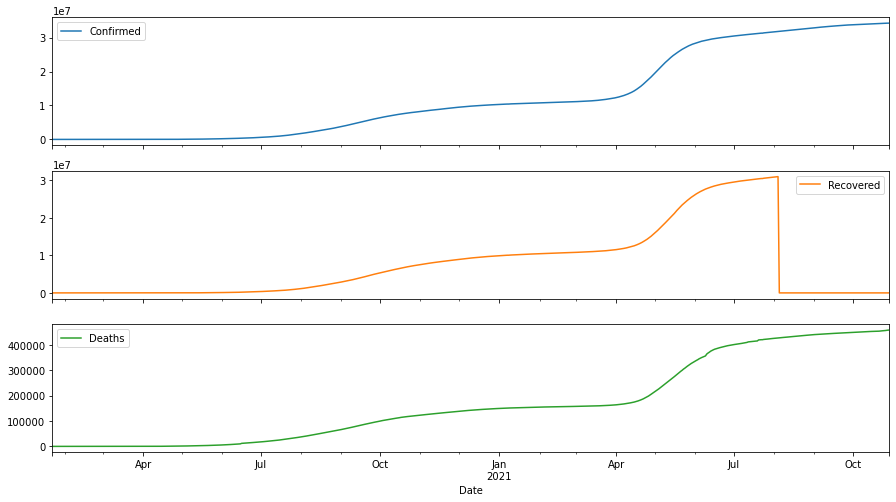

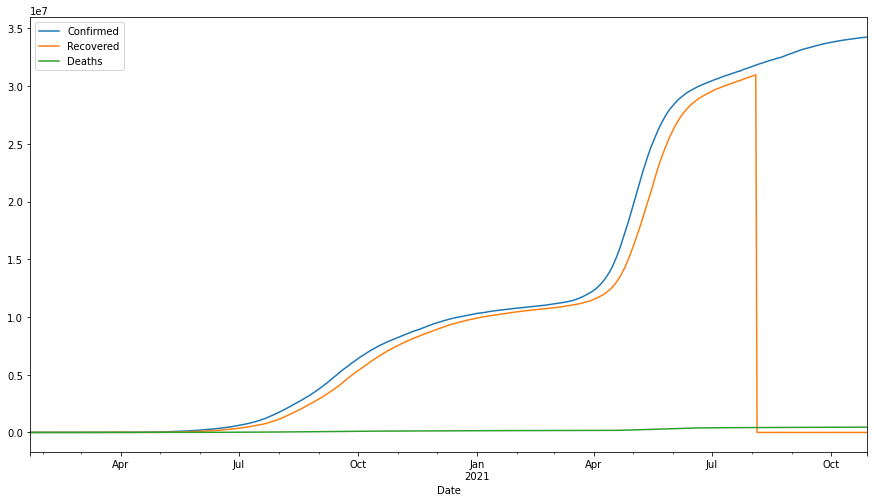

In [17]:
dfti=dft[dft['Country']=='India']
dfti.plot(x='Date',kind='line',figsize=[15,8],subplots=True)
dfti.plot(x='Date',kind='line',figsize=[15,8],subplots=False)

>Indepth of the same above graph

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

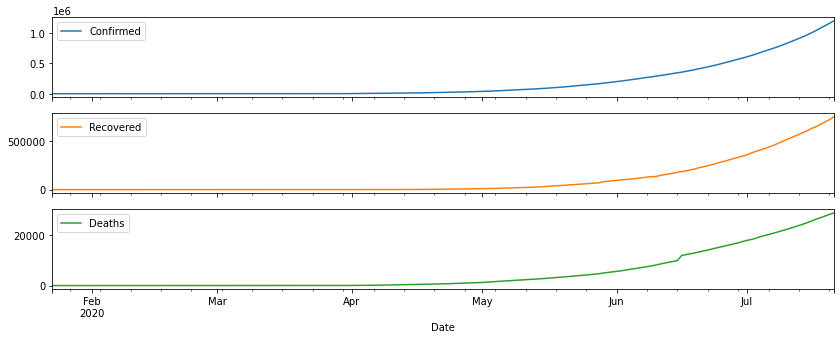

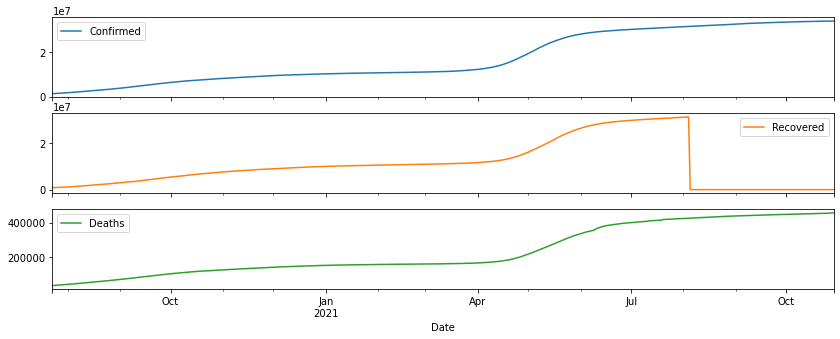

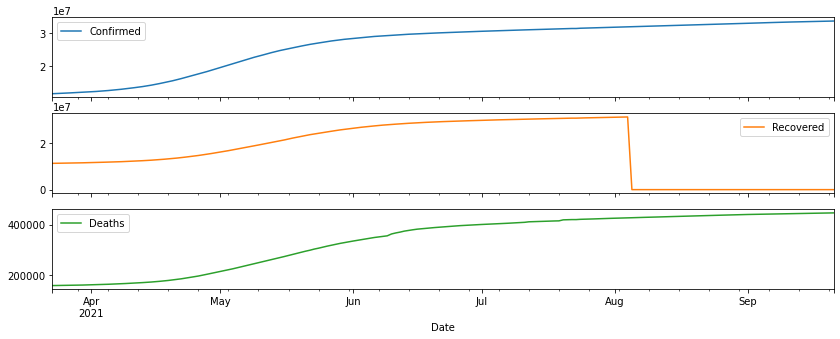

In [18]:
start_date = pd.to_datetime('2020-01-22')
end_date = pd.to_datetime('2020-07-22')
dfti.loc[(dfti['Date'] > start_date) & (dfti['Date'] < end_date)].plot(x='Date',figsize=[14,5],subplots=True)
start_date = pd.to_datetime('2020-07-22')
end_date = pd.to_datetime('2021-11-22')
dfti.loc[(dfti['Date'] > start_date) & (dfti['Date'] < end_date)].plot(x='Date',figsize=[14,5],subplots=True)
start_date = pd.to_datetime('2021-03-22')
end_date = pd.to_datetime('2021-09-22')
dfti.loc[(dfti['Date'] > start_date) & (dfti['Date'] < end_date)].plot(x='Date',figsize=[14,5],subplots=True)


### Timeseries Vaccination Data of All States in India 

In [19]:
dftvs=pd.read_csv('covid_vaccine_statewise.csv',parse_dates=['Updated On'],infer_datetime_format='dd/mm/yyyy')
dftvs.drop(columns=[' Sites ','Sessions'],inplace=True)
dftvs
# dftvs.info()
# dftvs.columns

,Updated On,State,Total Doses Administered,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,2021-01-16,India,48276.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,2021-01-17,India,58604.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,2021-01-18,India,99449.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,2021-01-19,India,195525.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,2021-01-20,India,251280.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,2021-08-11,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,2021-08-12,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,2021-08-13,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,2021-08-14,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Extracting Overall India Data and Analysing

C:\Users\KHADGA JYOTH ALLI\anaconda3\lib\site-packages\pandas\core\frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Updated On,State,Total Doses Administered,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated,Confirmed,Recovered,Deaths
0,2021-01-16,India,48276.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,...,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0,10571773.0,10211342.0,152419.0
1,2021-01-17,India,58604.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,...,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0,10581823.0,10228753.0,152556.0
2,2021-01-18,India,99449.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,...,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0,10595639.0,10245741.0,152718.0
3,2021-01-19,India,195525.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,...,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0,10610883.0,10265706.0,152869.0
4,2021-01-20,India,251280.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,...,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0,10625428.0,10283702.0,153032.0


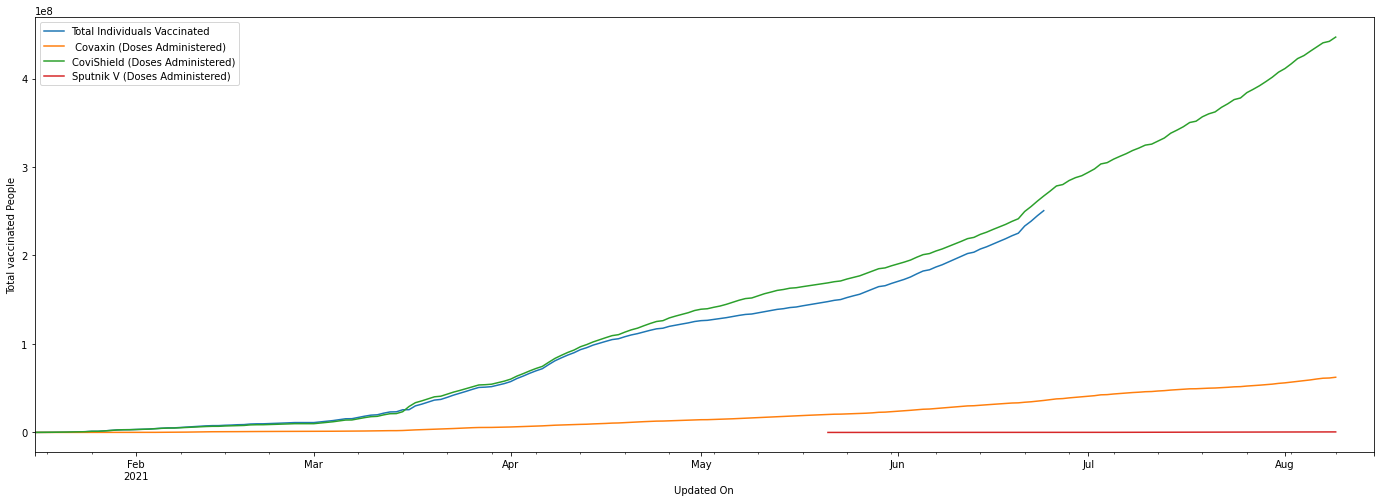

In [20]:
dftvi = dftvs.loc[dftvs['State']=='India']
# This is required since the vaccination data is only available from Jan 2021
start_date = pd.to_datetime('2021-01-16')
end_date = pd.to_datetime('2021-08-16')
dftvi[['Confirmed'	,'Recovered',	'Deaths']] = dfti.loc[(dfti['Date'] > start_date) & (dfti['Date'] < end_date)].drop(columns=['Date','Country']).reset_index(drop=True)
# Connecting the data from Covid Cases TImeseries and Vaccination data for a Fuller Picture.
dftvi.plot(x='Updated On',y=['Total Individuals Vaccinated',' Covaxin (Doses Administered)','CoviShield (Doses Administered)','Sputnik V (Doses Administered)'],kind='line',ylabel = 'Total vaccinated People',legend='Vaccinated',figsize=[24,8])
dftvi.head()

<AxesSubplot:title={'center':'Vaccinated people and Covid'}, xlabel='Updated On'>

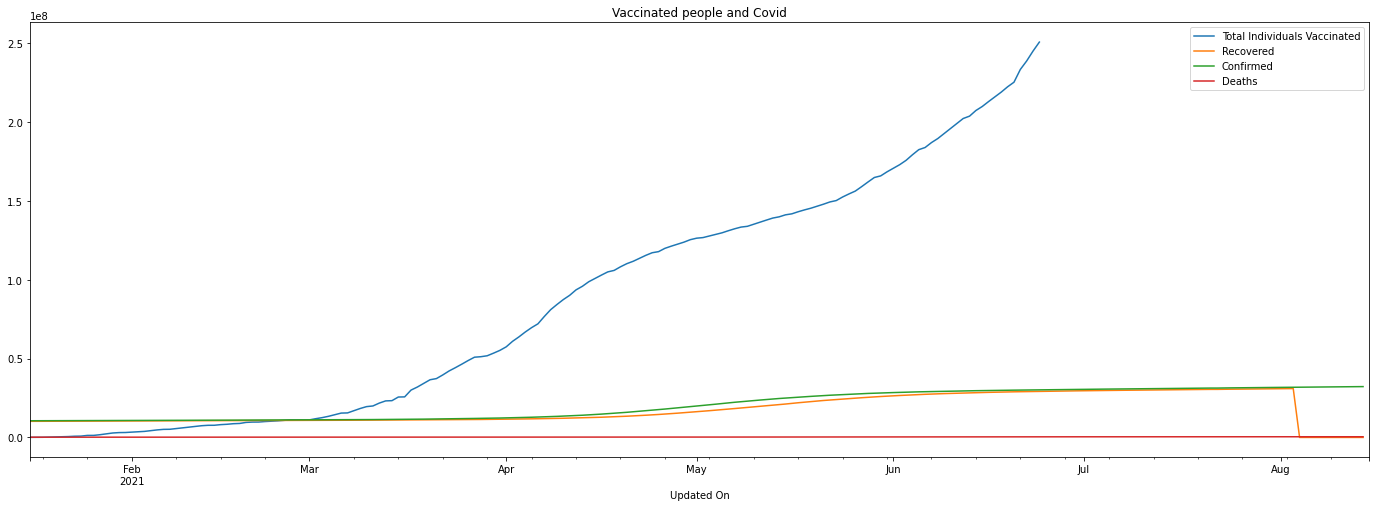

In [21]:
dftvi.plot(x='Updated On',y=['Total Individuals Vaccinated','Recovered','Confirmed','Deaths'],figsize=[24,8],subplots=False,kind='line',title='Vaccinated people and Covid')

>Extacting the Daily change of vaccinated, confirmed cases, Recovered, Deaths as roc_* variable

In [22]:
dftvi[['roc_vaccinated','roc_cases','roc_recovered','roc_deaths']] = dftvi[['Total Individuals Vaccinated','Confirmed','Recovered','Deaths']].diff()
# some cleaning of roc_recovered data as recovered contains 0's beyond index 199
dftvi['roc_recovered'][dftvi['roc_recovered']<=0]=dftvi[dftvi['roc_recovered']>0]['roc_recovered'].mean()
dftvi[dftvi.columns[-8:]]

C:\Users\KHADGA JYOTH ALLI\anaconda3\lib\site-packages\pandas\core\frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\KHADGA~1\AppData\Local\Temp/ipykernel_18972/2545281398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftvi['roc_recovered'][dftvi['roc_recovered']<=0]=dftvi[dftvi['roc_recovered']>0]['roc_recovered'].mean()
C:\Users\KHADGA JYOTH ALLI\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

,Total Individuals Vaccinated,Confirmed,Recovered,Deaths,roc_vaccinated,roc_cases,roc_recovered,roc_deaths
0,48276.0,10571773.0,10211342.0,152419.0,NaN,NaN,NaN,NaN
1,58604.0,10581823.0,10228753.0,152556.0,10328.0,10050.0,17411.000000,137.0
2,99449.0,10595639.0,10245741.0,152718.0,40845.0,13816.0,16988.000000,162.0
3,195525.0,10610883.0,10265706.0,152869.0,96076.0,15244.0,19965.000000,151.0
4,251280.0,10625428.0,10283702.0,153032.0,55755.0,14545.0,17996.000000,163.0
...,...,...,...,...,...,...,...,...
207,NaN,32117826.0,0.0,430254.0,NaN,40120.0,104865.686869,585.0
208,NaN,32156493.0,0.0,430732.0,NaN,38667.0,104865.686869,478.0
209,NaN,32192576.0,0.0,431225.0,NaN,36083.0,104865.686869,493.0
210,NaN,32225513.0,0.0,431642.0,NaN,32937.0,104865.686869,417.0


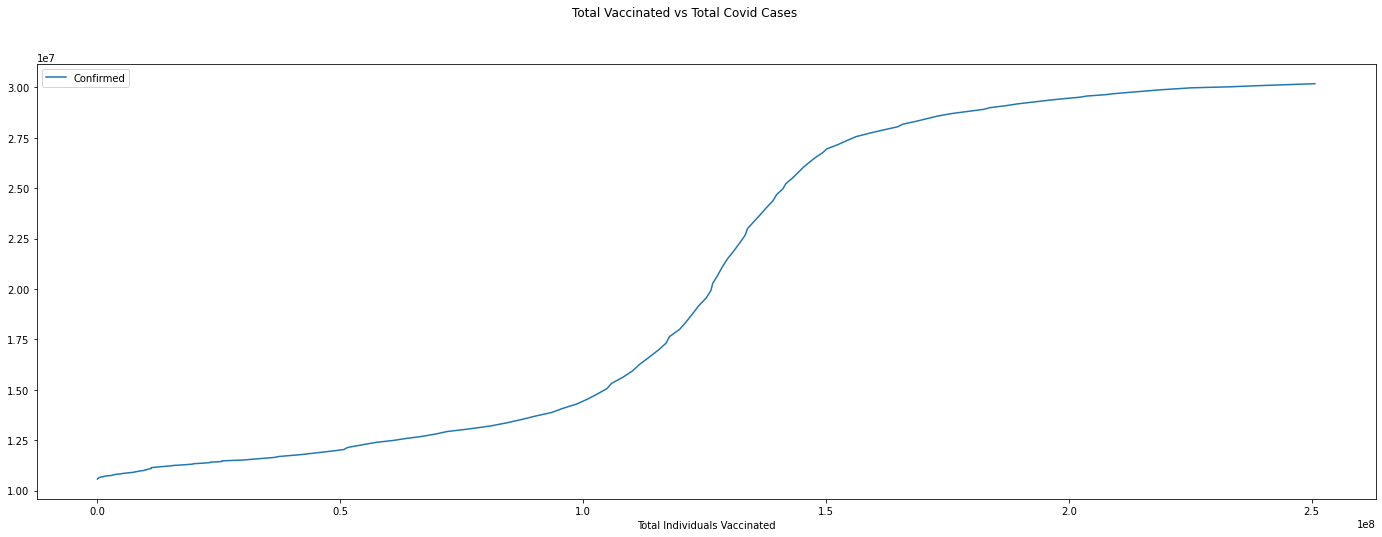

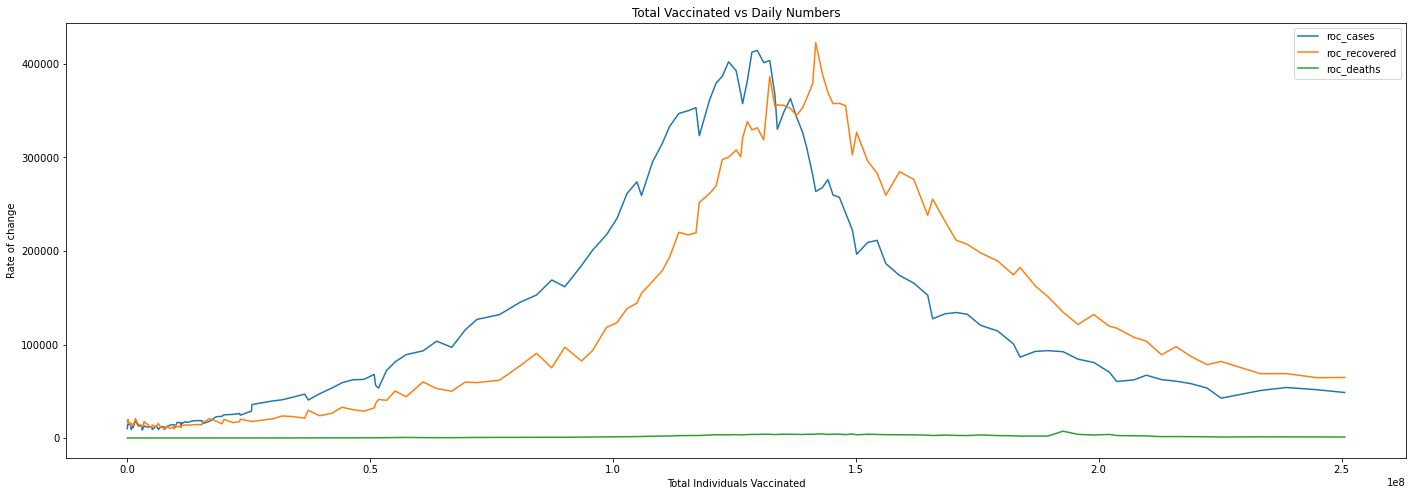

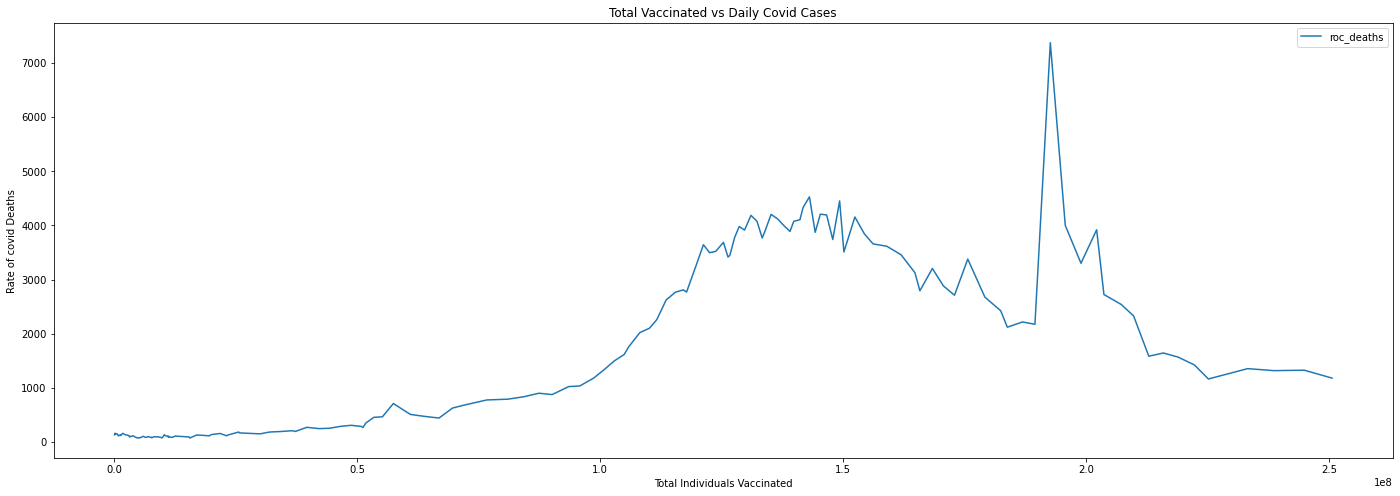

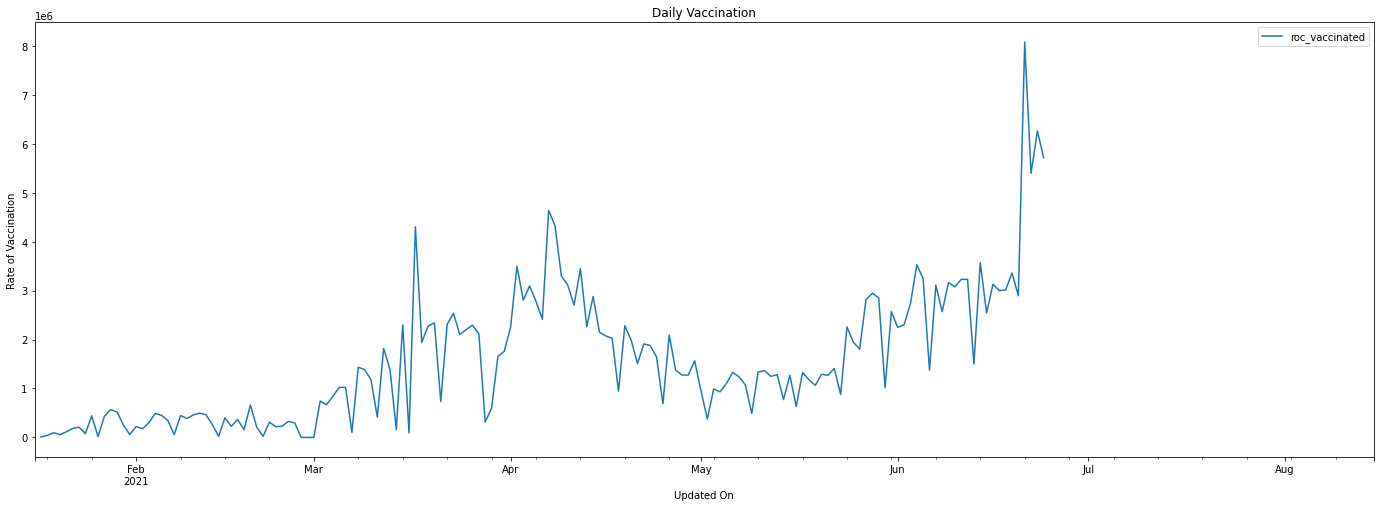

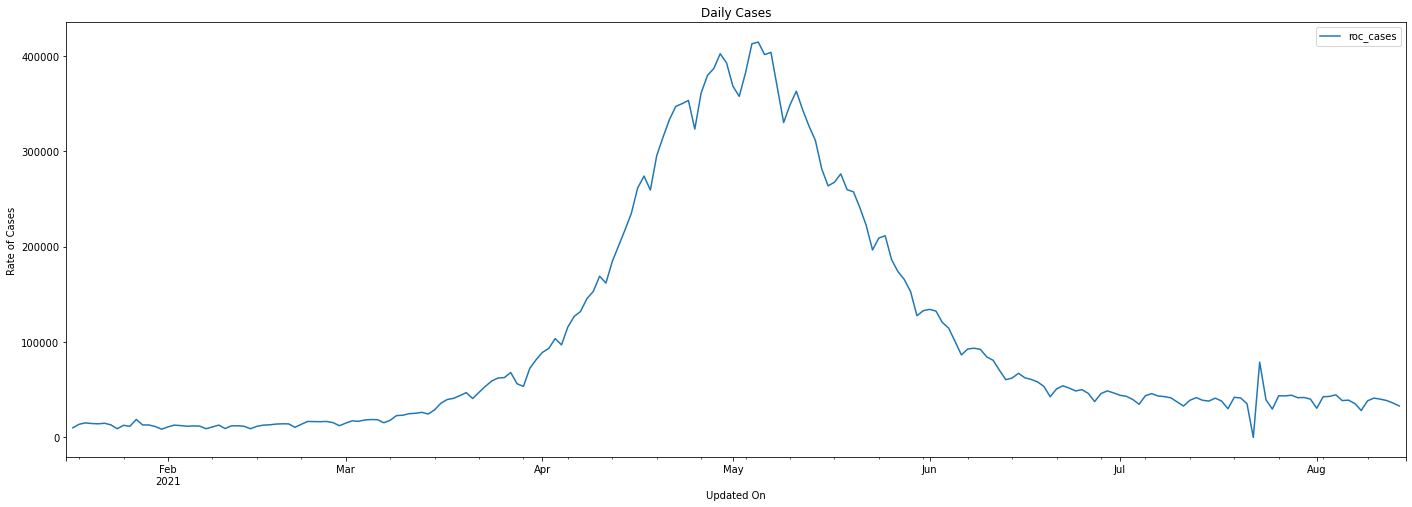

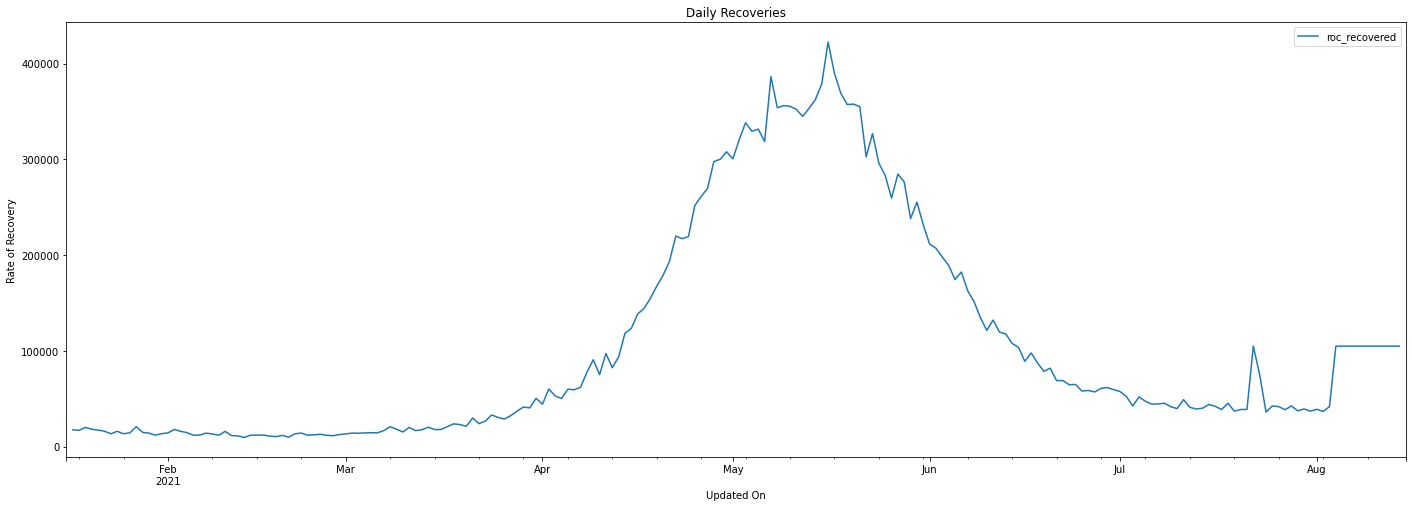

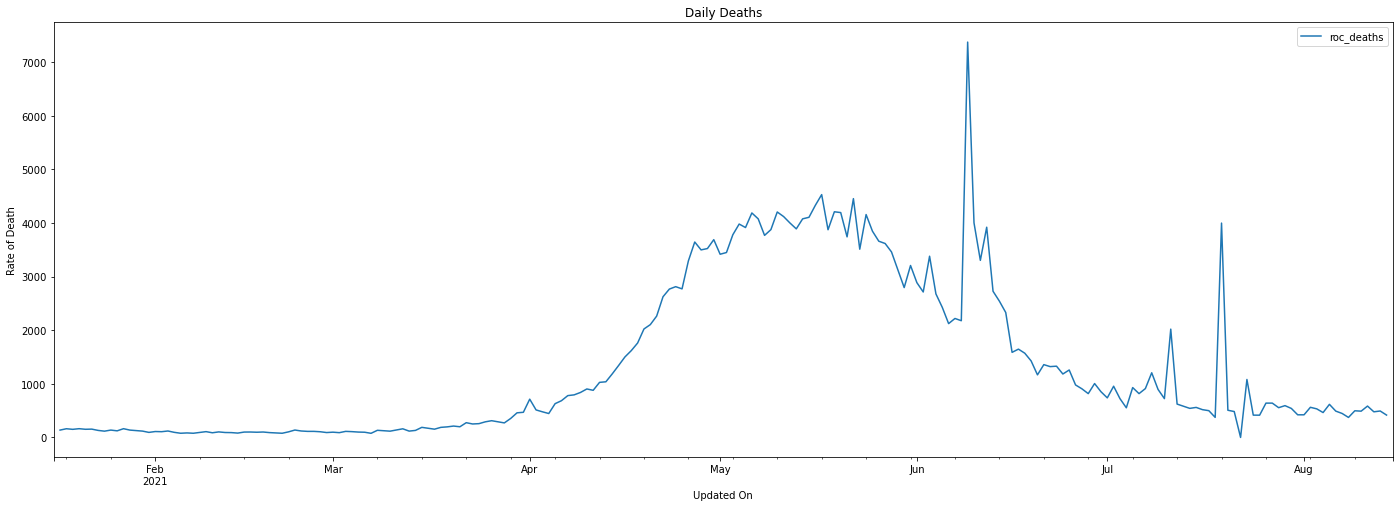

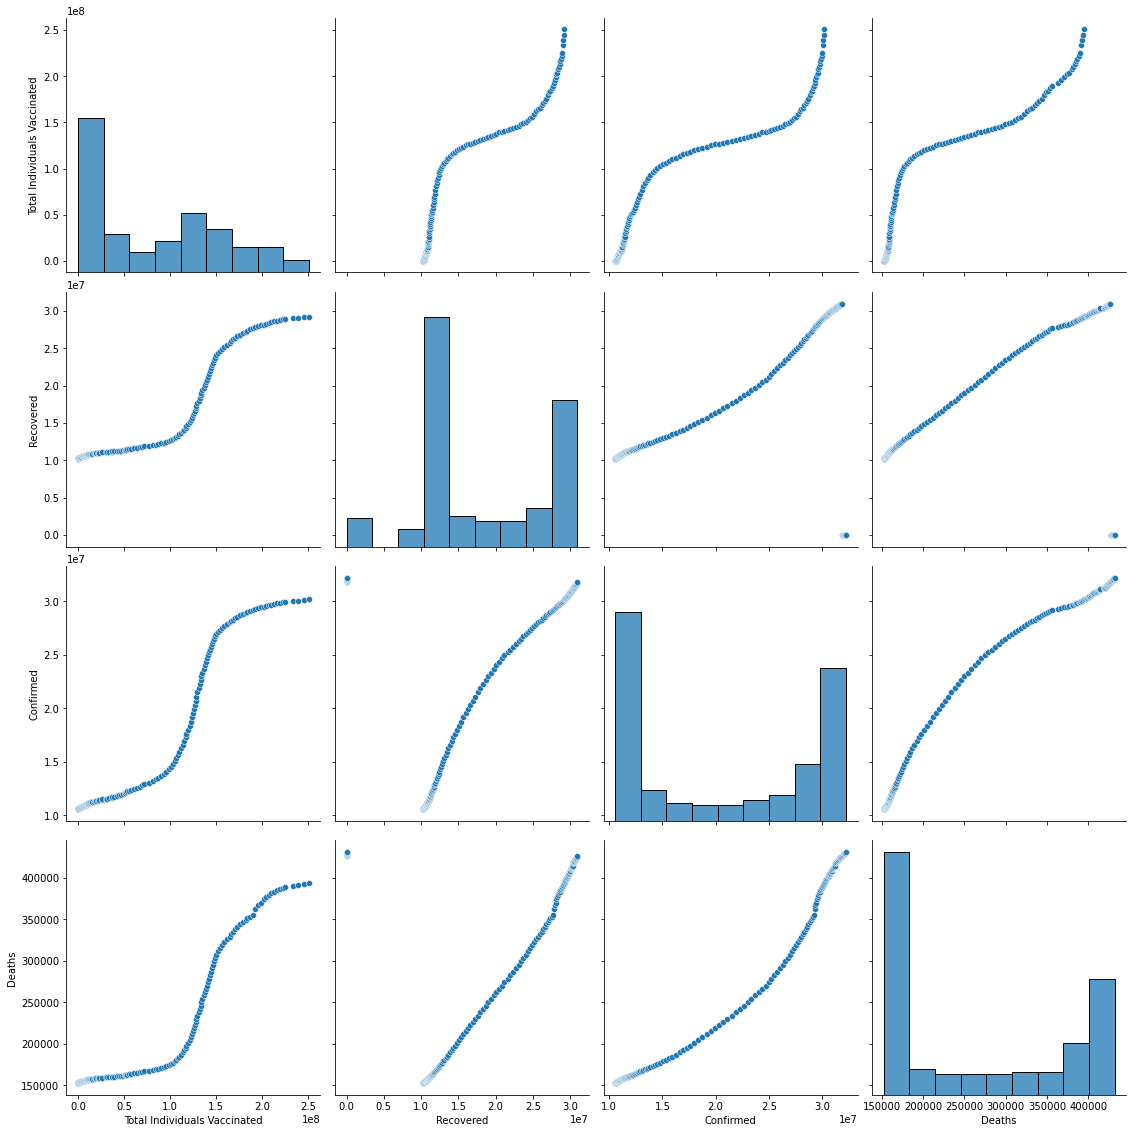

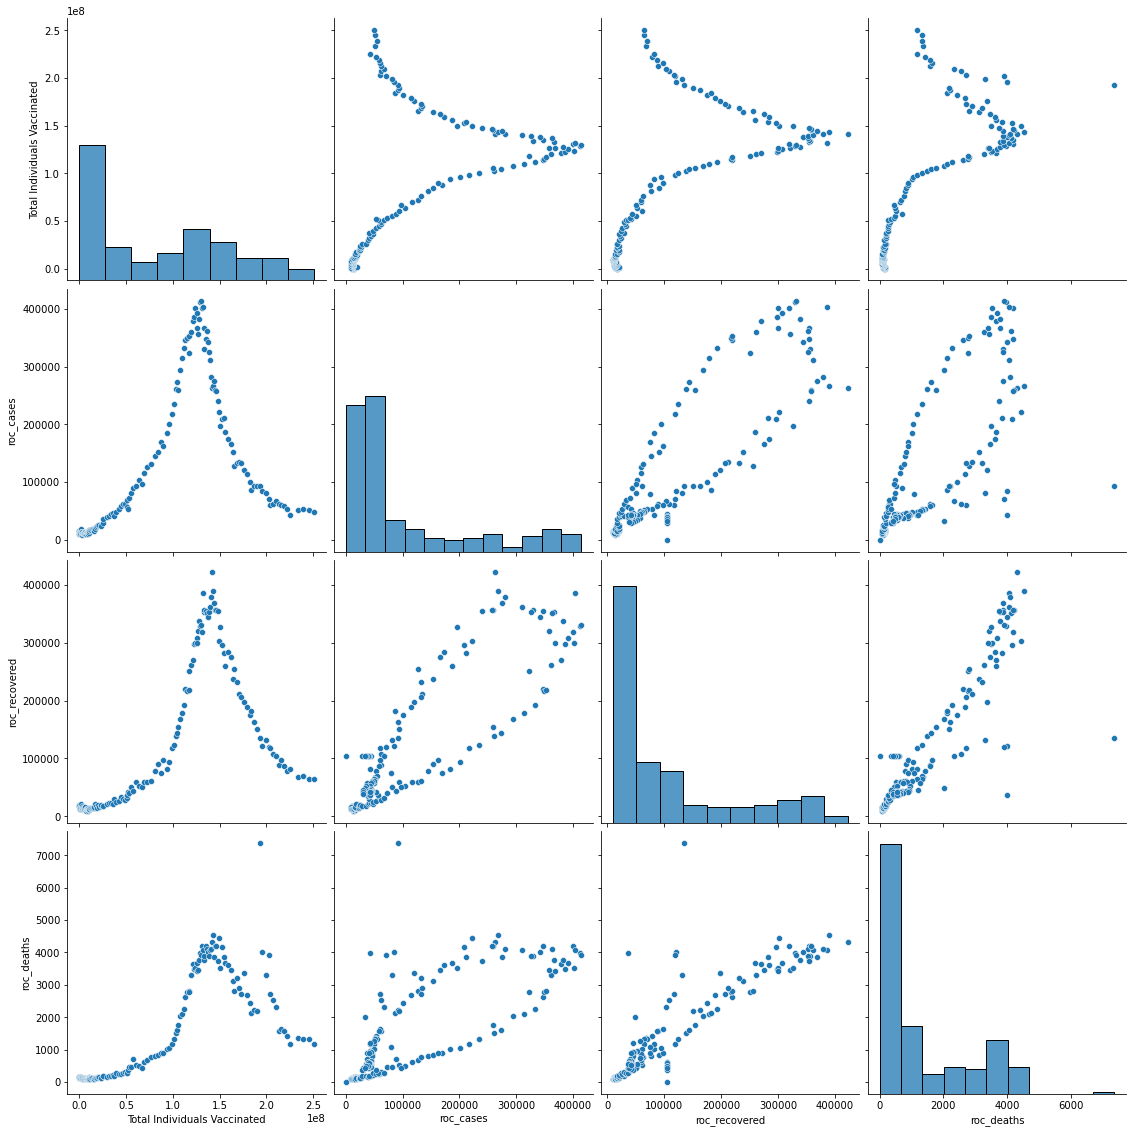

In [23]:
dftvi.plot(x='Total Individuals Vaccinated',y=['Confirmed'],figsize=[24,8],kind='line',subplots=True,title = 'Total Vaccinated vs Total Covid Cases')
dftvi.plot(x='Total Individuals Vaccinated',y=['roc_cases','roc_recovered','roc_deaths'],figsize=[24,8],kind='line',ylabel='Rate of change',title = 'Total Vaccinated vs Daily Numbers')
dftvi.plot(x='Total Individuals Vaccinated',y='roc_deaths',figsize=[24,8],kind='line',ylabel='Rate of covid Deaths',title = 'Total Vaccinated vs Daily Covid Cases')
dftvi.plot(x='Updated On',y=['roc_vaccinated'],figsize=[24,8],kind='line',ylabel='Rate of Vaccination',title = 'Daily Vaccination')
dftvi.plot(x='Updated On',y=['roc_cases'],figsize=[24,8],kind='line',ylabel='Rate of Cases',title = 'Daily Cases')
dftvi.plot(x='Updated On',y=['roc_recovered'],figsize=[24,8],kind='line',ylabel='Rate of Recovery',title = 'Daily Recoveries')
dftvi.plot(x='Updated On',y=['roc_deaths'],figsize=[24,8],kind='line',ylabel='Rate of Death',title = 'Daily Deaths')
sns.pairplot(dftvi[['Total Individuals Vaccinated','Recovered','Confirmed','Deaths']],height=4,kind = 'scatter')
sns.pairplot(dftvi[['Total Individuals Vaccinated','roc_cases','roc_recovered','roc_deaths']],height=4,kind = 'scatter')

>The Other Variables in the Data are not explored (will do in spare time) but, I expect them to definitely yield some interesting results.